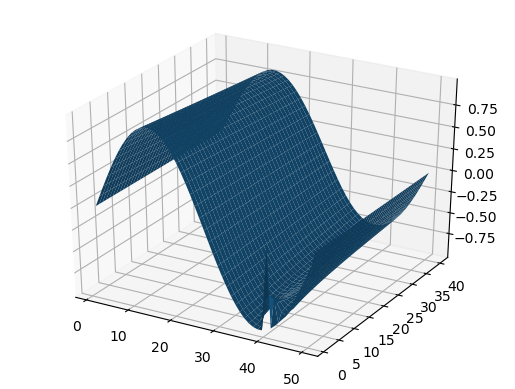

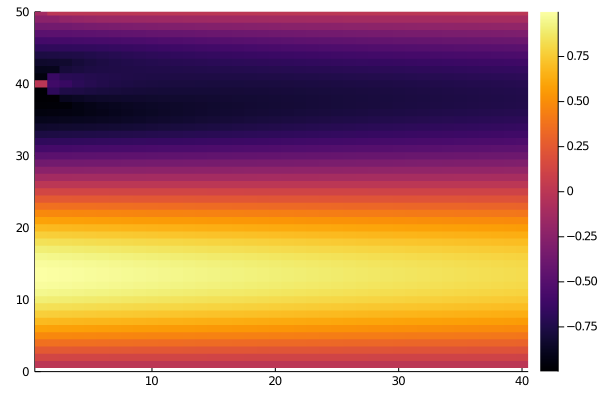

In [15]:
using PyPlot
using Plots
startcond = x-> sin(2*pi*x)
bordrcond = x-> 0
D(u) = 1 
Φ(u) = 0 

function linexplicit(Nx = 50, Nt = 40; tlmt = 0.01)
    dx = 1/Nx
    dt = tlmt/Nt
    k = dt/(dx*dx)

    x = [i for i in range(0, length = Nx, step = dx)] 
    t = [i for i in range(0, length = Nt, step = dt)] 
    U = zeros(Nx, Nt)
    

    U[: ,1] = startcond.(x)
    U[1 ,:] = U[Nt,:] = bordrcond.(t)

    for j = 1:Nt-1, i = 2:Nx-1
        U[i, j+1] = U[i,j]*(1-2k*D( U[i,j] )) + k*U[i-1,j]*D( U[i-1,j] ) + k*U[i+1,j]*D( U[i+1,j] ) + dt*Φ(U[i,j])
    end
     x, U
end

X, A = linexplicit( tlmt = 0.005)

#plot(X,A[:,1])
#plot!(X, Ans2[:,10],t, lab = "t10")
#plot!(X, Ans2[:,20],t, lab = "t20")
U2 = [ A[i,j] for i = 1:50, j = 1:size(A,2) ] 
surf(U2)
heatmap(A, yaxis=((0, 50), 0:10:50),camera = (-60,90))
